In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from typing import Tuple, Dict

import os
import ast
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from thor_magni_tools.utils.load import load_csv_metadata_magni, preprocessing_header_magni
from thor_magni_tools.preprocessing.filtering import Filterer3DOF, Filterer6DOF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DIR_PATH = "../datasets/thor_magni_zenodo/"
SCENARIO_ID = "Scenario_1"

In [4]:
files_list = os.listdir(os.path.join(DIR_PATH, SCENARIO_ID))
files_list

['THOR-Magni_180522_SC1B_R2.csv',
 'THOR-Magni_130522_SC1A_R1.csv',
 'THOR-Magni_120522_SC1B_R2.csv',
 'THOR-Magni_130522_SC1B_R1.csv',
 'THOR-Magni_180522_SC1B_R1.csv',
 'THOR-Magni_170522_SC1B_R2.csv',
 'THOR-Magni_130522_SC1A_R2.csv',
 'THOR-Magni_130522_SC1B_R2.csv',
 'THOR-Magni_180522_SC1A_R1.csv',
 'THOR-Magni_170522_SC1B_R1.csv',
 'THOR-Magni_120522_SC1A_R1.csv',
 'THOR-Magni_120522_SC1B_R1.csv',
 'THOR-Magni_180522_SC1A_R2.csv',
 'THOR-Magni_170522_SC1A_R1.csv',
 'THOR-Magni_170522_SC1A_R2.csv',
 'THOR-Magni_120522_SC1A_R2.csv']

In [5]:
raw_df, header_dict = load_csv_metadata_magni(
    os.path.join(DIR_PATH, SCENARIO_ID, "THOR-Magni_120522_SC1B_R1.csv")
)

/home/tmr/Documents/PhD/My_PhD/code/thor-magni-tools-new/thor_magni_tools/utils/load.py:90: DtypeWarning: Columns (231,232,233,239,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(


In [6]:
new_header_dict = preprocessing_header_magni(header_dict)

In [7]:
traj_metadata = new_header_dict["SENSOR_DATA"]["TRAJECTORIES"]["METADATA"]

In [8]:
target_agents = tuple(
    body_name
    for body_name, meta_data in traj_metadata.items()
    if len(meta_data["MARKERS_NAMES"]) > 0
)
target_agents_with_markers = tuple(
    body_name + " - " + marker_name
    for body_name in target_agents
    for marker_name in traj_metadata[body_name]["MARKERS_NAMES"]
)

In [9]:
df = raw_df.dropna(axis=1, how="all")

In [10]:
target_agents

('Helmet_6',
 'Helmet_4',
 'Helmet_5',
 'Helmet_1',
 'Helmet_7',
 'Helmet_2',
 'Helmet_8',
 'Helmet_10',
 'Helmet_3',
 'DARKO_Robot')

# Preprocessing

In [11]:
PREPROCESSING_TYPE = "3D"

In [12]:
columns_suff = ("X", "Y", "Z")
if PREPROCESSING_TYPE == "6D":
    columns_axis = tuple(f"Centroid_{axis}" for axis in columns_suff)
    columns_rot = tuple(f"R{rot}" for rot in range(9))
    columns_suff = columns_axis + columns_rot
columns_suff

('X', 'Y', 'Z')

In [13]:
filtered_columns = [
    col
    for col in df.columns
    if (
        col.startswith(target_agents)
        and col.endswith(columns_suff)
    )
]

In [14]:
target_data = df[["Frame"] + filtered_columns]
target_data

,Frame,DARKO_Robot - 1 X,DARKO_Robot - 1 Y,DARKO_Robot - 1 Z,DARKO_Robot - 2 X,DARKO_Robot - 2 Y,DARKO_Robot - 2 Z,DARKO_Robot - 3 X,DARKO_Robot - 3 Y,DARKO_Robot - 3 Z,...,Helmet_8 - 3 Z,Helmet_8 - 4 X,Helmet_8 - 4 Y,Helmet_8 - 4 Z,Helmet_8 - 5 X,Helmet_8 - 5 Y,Helmet_8 - 5 Z,Helmet_8 Centroid_X,Helmet_8 Centroid_Y,Helmet_8 Centroid_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.01,2,-4234.196,-779.604,692.075,-4006.843,-1284.119,691.486,-4989.450,-1034.982,299.463,...,1984.130,-479.585,-3379.479,1898.451,-562.359,-3484.592,1891.957,-551.26954,-3414.33914,1918.24417
0.02,3,-4234.260,-779.616,692.084,-4006.844,-1284.065,691.444,-4989.459,-1034.986,299.509,...,1983.129,-478.842,-3378.809,1898.466,-561.157,-3484.245,1891.989,-551.51016,-3414.27644,1917.63683
0.03,4,-4234.202,-779.574,692.078,-4002.962,-1284.731,693.225,-4989.447,-1034.985,299.474,...,1982.993,-476.530,-3379.204,1898.408,-559.976,-3483.848,1892.027,-550.30319,-3414.09001,1917.53441
0.04,5,-4234.223,-779.658,692.072,-4002.778,-1284.900,693.384,-4989.461,-1034.971,299.510,...,1983.028,-475.420,-3379.014,1898.321,-558.681,-3483.438,1892.148,-549.21137,-3413.90138,1917.55683
0.05,6,-4234.301,-779.719,692.071,-4002.967,-1285.126,693.366,-4989.850,-1035.042,299.012,...,1982.754,-474.966,-3378.012,1898.279,-557.289,-3483.090,1891.887,-548.41404,-3413.26950,1917.40821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249.96,24997,-4232.016,-779.700,693.047,-4003.213,-1285.192,693.203,-4990.252,-1035.007,298.976,...,1970.523,2634.253,1147.041,1881.396,2511.841,1184.578,1912.175,2582.80742,1202.43320,1916.43978
249.97,24998,-4232.011,-779.687,693.018,-4003.237,-1285.204,693.222,-4990.235,-1034.996,298.965,...,1970.367,2636.744,1146.785,1881.338,2514.529,1184.688,1911.994,2585.45828,1202.35859,1916.27242
249.98,24999,-4231.976,-779.707,693.061,-4003.236,-1285.206,693.184,-4990.267,-1034.998,299.023,...,1970.228,2639.324,1146.402,1881.223,2517.090,1184.691,1911.849,2588.14367,1202.19250,1916.12669


In [15]:
roles = {k: metadata["ROLE"] for k, metadata in traj_metadata.items()}
if PREPROCESSING_TYPE == "6D":
    nans_counter = {
        body_name: target_data[body_name + " Centroid_X"].isna().sum()
        for body_name in target_agents
    }
    new_df = Filterer6DOF.reorganize_df(target_data, target_agents, roles)
elif PREPROCESSING_TYPE == "3D":
    new_df = Filterer3DOF.filter_best_markers(target_data, roles)

In [16]:
new_df

,frame_id,ag_id,x,y,z,data_label,marker_id
Time,,,,,,,
0.01,2,Helmet_3,NaN,NaN,NaN,Visitors-Alone,4
0.01,2,Helmet_10,NaN,NaN,NaN,Visitors-Group 3,1
0.01,2,Helmet_4,-713.404,2489.321,1918.689,Visitors-Group 2,4
0.01,2,Helmet_1,-1737.087,-3181.006,1955.014,Visitors-Alone,1
0.01,2,Helmet_8,-516.957,-3393.754,1984.130,Visitors-Alone,3
...,...,...,...,...,...,...,...
250.00,25001,Helmet_6,7064.607,1450.586,1770.937,Visitors-Alone,1
250.00,25001,Helmet_2,1273.340,2075.258,1768.361,Visitors-Group 3,3
250.00,25001,Helmet_3,5609.897,1478.390,1831.109,Visitors-Alone,4


# THOR restore trajectories

In [18]:
target_data

,Frame,DARKO_Robot - 1 X,DARKO_Robot - 1 Y,DARKO_Robot - 1 Z,DARKO_Robot - 2 X,DARKO_Robot - 2 Y,DARKO_Robot - 2 Z,DARKO_Robot - 3 X,DARKO_Robot - 3 Y,DARKO_Robot - 3 Z,...,Helmet_8 - 3 Z,Helmet_8 - 4 X,Helmet_8 - 4 Y,Helmet_8 - 4 Z,Helmet_8 - 5 X,Helmet_8 - 5 Y,Helmet_8 - 5 Z,Helmet_8 Centroid_X,Helmet_8 Centroid_Y,Helmet_8 Centroid_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.01,2,-4234.196,-779.604,692.075,-4006.843,-1284.119,691.486,-4989.450,-1034.982,299.463,...,1984.130,-479.585,-3379.479,1898.451,-562.359,-3484.592,1891.957,-551.26954,-3414.33914,1918.24417
0.02,3,-4234.260,-779.616,692.084,-4006.844,-1284.065,691.444,-4989.459,-1034.986,299.509,...,1983.129,-478.842,-3378.809,1898.466,-561.157,-3484.245,1891.989,-551.51016,-3414.27644,1917.63683
0.03,4,-4234.202,-779.574,692.078,-4002.962,-1284.731,693.225,-4989.447,-1034.985,299.474,...,1982.993,-476.530,-3379.204,1898.408,-559.976,-3483.848,1892.027,-550.30319,-3414.09001,1917.53441
0.04,5,-4234.223,-779.658,692.072,-4002.778,-1284.900,693.384,-4989.461,-1034.971,299.510,...,1983.028,-475.420,-3379.014,1898.321,-558.681,-3483.438,1892.148,-549.21137,-3413.90138,1917.55683
0.05,6,-4234.301,-779.719,692.071,-4002.967,-1285.126,693.366,-4989.850,-1035.042,299.012,...,1982.754,-474.966,-3378.012,1898.279,-557.289,-3483.090,1891.887,-548.41404,-3413.26950,1917.40821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249.96,24997,-4232.016,-779.700,693.047,-4003.213,-1285.192,693.203,-4990.252,-1035.007,298.976,...,1970.523,2634.253,1147.041,1881.396,2511.841,1184.578,1912.175,2582.80742,1202.43320,1916.43978
249.97,24998,-4232.011,-779.687,693.018,-4003.237,-1285.204,693.222,-4990.235,-1034.996,298.965,...,1970.367,2636.744,1146.785,1881.338,2514.529,1184.688,1911.994,2585.45828,1202.35859,1916.27242
249.98,24999,-4231.976,-779.707,693.061,-4003.236,-1285.206,693.184,-4990.267,-1034.998,299.023,...,1970.228,2639.324,1146.402,1881.223,2517.090,1184.691,1911.849,2588.14367,1202.19250,1916.12669


In [19]:
instances = set(target_data.columns.str.split(" - ").str[0])
instances = list(filter(lambda x: len(x.split(" ")) == 1, instances))

In [20]:
instances

['Helmet_3',
 'Helmet_2',
 'Helmet_6',
 'Helmet_8',
 'Helmet_4',
 'Frame',
 'DARKO_Robot',
 'Helmet_10',
 'Helmet_1',
 'Helmet_7',
 'Helmet_5']

In [94]:
helmets_restored = []
for instance_id in instances:
    instance_df = target_data[
        target_data.columns[target_data.columns.str.startswith(instance_id)]
    ]
    instance_cols = instance_df.columns
    new_axes_df = {f"{instance_id} {axis}": None for axis in ["X", "Y", "Z"]}
    for axis in ["X", "Y", "Z"]:
        axis_df = instance_df[
            instance_cols[
                (instance_df.columns.str.endswith(axis))
                & (~instance_df.columns.str.contains("Centroid"))
            ]
        ]
        axis_mean = axis_df.mean(axis=1, skipna=True, numeric_only=True)
        new_axes_df[f"{instance_id} {axis}"] = axis_mean
    helmets_restored.append(pd.DataFrame.from_dict(new_axes_df))

In [98]:
pd.DataFrame.from_dict(new_axes_df)

,Helmet_5 X,Helmet_5 Y,Helmet_5 Z
Time,,,
0.01,-7608.1030,-2361.3360,1697.6680
0.02,-7607.7500,-2361.1050,1697.5410
0.03,-7579.2030,-2414.6096,1637.7068
0.04,-7579.2974,-2414.6072,1637.7910
0.05,-7579.2450,-2414.4150,1637.8980
...,...,...,...
249.96,507.0660,2291.9090,1664.4688
249.97,507.3188,2287.2962,1664.1028
249.98,507.5142,2282.6146,1663.7934


In [99]:
pd.concat(helmets_restored, axis=1)

,Helmet_3 X,Helmet_3 Y,Helmet_3 Z,Helmet_2 X,Helmet_2 Y,Helmet_2 Z,Helmet_6 X,Helmet_6 Y,Helmet_6 Z,Helmet_8 X,...,Helmet_10 Z,Helmet_1 X,Helmet_1 Y,Helmet_1 Z,Helmet_7 X,Helmet_7 Y,Helmet_7 Z,Helmet_5 X,Helmet_5 Y,Helmet_5 Z
Time,,,,,,,,,,,,,,,,,,,,,
0.01,9027.69050,-197.74100,1799.01100,NaN,NaN,NaN,NaN,NaN,NaN,-551.2696,...,1876.698000,-3328.110000,-3229.259750,1873.521500,-519.308800,3177.500000,1890.118200,-7608.1030,-2361.3360,1697.6680
0.02,9024.71400,-196.80650,1799.73000,NaN,NaN,NaN,NaN,NaN,NaN,-551.5104,...,1876.555000,-3324.366000,-3231.508500,1873.467500,-514.010400,3179.247200,1888.224600,-7607.7500,-2361.1050,1697.5410
0.03,9024.51850,-195.97250,1799.91100,NaN,NaN,NaN,NaN,NaN,NaN,-550.3032,...,1876.911000,-3323.519750,-3234.703500,1873.541750,-508.140200,3179.005800,1885.621200,-7579.2030,-2414.6096,1637.7068
0.04,9022.91700,-194.63900,1800.53750,NaN,NaN,NaN,NaN,NaN,NaN,-549.2112,...,1877.344000,-3321.000500,-3237.436500,1873.581250,-503.360800,3179.370400,1883.189800,-7579.2974,-2414.6072,1637.7910
0.05,9018.82250,-193.92300,1801.35900,NaN,NaN,NaN,NaN,NaN,NaN,-548.4142,...,1876.460000,-3318.306750,-3240.216000,1873.178000,-498.328800,3180.429200,1880.556400,-7579.2450,-2414.4150,1637.8980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249.96,5598.89325,1529.26425,1810.51075,1328.23675,2100.56825,1710.99525,7023.0895,1440.7905,1742.8060,2582.8074,...,1933.922080,773.545431,1467.446663,1921.708800,5515.101333,526.671333,1999.109667,507.0660,2291.9090,1664.4688
249.97,5591.32875,1527.23100,1811.01825,1329.07250,2099.48300,1710.86750,7014.5510,1441.6100,1743.5980,2585.4584,...,1934.564000,659.651857,1365.040714,1920.439571,5507.961333,526.500000,1999.395333,507.3188,2287.2962,1664.1028
249.98,5583.66375,1525.22850,1811.30700,1329.77200,2098.34425,1710.77775,7006.1140,1442.3985,1743.8975,2588.1436,...,1904.739371,798.789440,1422.106243,1903.673982,5500.736667,526.280667,1999.609667,507.5142,2282.6146,1663.7934


# Reprocessing

In [24]:
def interpolate_with_rule(
    input_df: pd.DataFrame, column_name: str, max_consecutive_nans: int
):
    """interpolate given a max number of consecutive nans"""
    mask = input_df[column_name].isna()
    groups = mask.ne(mask.shift()).cumsum()

    interpolated_column = input_df[column_name].interpolate(method="linear")

    interpolated_column = interpolated_column.where(
        groups.groupby(groups).transform("size") <= max_consecutive_nans,
        input_df[column_name],
    )

    input_df[column_name] = interpolated_column
    return input_df

In [25]:
MAX_NANS_TO_INTERPOLATE = 100
RESAMPLING_RULE = None
AVERAGE_WINDOW = None

In [26]:
faulty_columns = new_df.columns[new_df.columns.str.startswith(("x", "y", "z", "rot"))].tolist()
faulty_columns

['x', 'y', 'z']

In [27]:
agents_in_scenario = new_df["ag_id"].unique()
agents_preprocessed = []
for agent_id in agents_in_scenario:
    target_agent = new_df[new_df["ag_id"] == agent_id]
    target_agent_rule_int = target_agent.copy()
    for col_name in faulty_columns:
        target_agent_rule_int = interpolate_with_rule(
            target_agent_rule_int, col_name, MAX_NANS_TO_INTERPOLATE
        )
    data_label = target_agent_rule_int["data_label"].iloc[0]
    marker_id = (
                target_agent_rule_int["marker_id"].iloc[0]
                if "marker_id" in target_agent_rule_int.columns
                else None
            )
    if RESAMPLING_RULE or AVERAGE_WINDOW:
        target_agent_rule_int = target_agent_rule_int.copy()[["frame_id"] + faulty_columns]
        target_agent_rule_int.index = pd.TimedeltaIndex(
            target_agent_rule_int.index, unit="s"
        )
    if RESAMPLING_RULE:
        target_agent_rule_int = target_agent_rule_int.resample(
            rule=RESAMPLING_RULE
        ).first()
    if AVERAGE_WINDOW:
        target_agent_rule_int[faulty_columns] = (
            target_agent_rule_int[faulty_columns].rolling(AVERAGE_WINDOW).mean()
        )
    if target_agent_rule_int.index.dtype != float:
        target_agent_rule_int.index = target_agent_rule_int.index.total_seconds()
        target_agent_rule_int["ag_id"] = agent_id
        target_agent_rule_int["data_label"] = data_label
        if marker_id:
            target_agent_rule_int["marker_id"] = marker_id

    agents_preprocessed.append(target_agent_rule_int)
preprocessed_df = pd.concat(agents_preprocessed, axis=0).sort_index()

In [28]:
preprocessed_df

,frame_id,ag_id,x,y,z,data_label,marker_id
Time,,,,,,,
0.01,2,Helmet_1,-1737.087,-3181.006,1955.014,Visitors-Alone,1
0.01,2,Helmet_4,-713.404,2489.321,1918.689,Visitors-Group 2,4
0.01,2,Helmet_8,-516.957,-3393.754,1984.130,Visitors-Alone,3
0.01,2,Helmet_10,NaN,NaN,NaN,Visitors-Group 3,1
0.01,2,Helmet_6,NaN,NaN,NaN,Visitors-Alone,1
...,...,...,...,...,...,...,...
250.00,25001,Helmet_3,5609.897,1478.390,1831.109,Visitors-Alone,4
250.00,25001,Helmet_2,1273.340,2075.258,1768.361,Visitors-Group 3,3
250.00,25001,Helmet_1,-520.188,-226.954,1947.408,Visitors-Alone,1


In [29]:
if PREPROCESSING_TYPE == "6D":
    postprocessed_nans_counter = {
        body_name: preprocessed_df[preprocessed_df["ag_id"] == body_name]["x_centroid"]
        .isna()
        .sum()
        for body_name in target_agents
    }
elif PREPROCESSING_TYPE == "3D":
    nans_counter = {
        body_name: new_df[new_df["ag_id"] == body_name]["x"]
        .isna()
        .sum()
        for body_name in target_agents
    }
    postprocessed_nans_counter = {
        body_name: preprocessed_df[preprocessed_df["ag_id"] == body_name]["x"]
        .isna()
        .sum()
        for body_name in target_agents
    }

In [30]:
nans_counter

{'Helmet_6': 4780,
 'Helmet_4': 1940,
 'Helmet_5': 4821,
 'Helmet_1': 2551,
 'Helmet_7': 2997,
 'Helmet_2': 4720,
 'Helmet_8': 3892,
 'Helmet_10': 2971,
 'Helmet_3': 4363,
 'DARKO_Robot': 0}

In [31]:
postprocessed_nans_counter

{'Helmet_6': 4493,
 'Helmet_4': 1659,
 'Helmet_5': 4118,
 'Helmet_1': 2311,
 'Helmet_7': 1935,
 'Helmet_2': 4135,
 'Helmet_8': 3459,
 'Helmet_10': 2590,
 'Helmet_3': 4045,
 'DARKO_Robot': 0}

In [32]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 29}

matplotlib.rc('font', **font)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

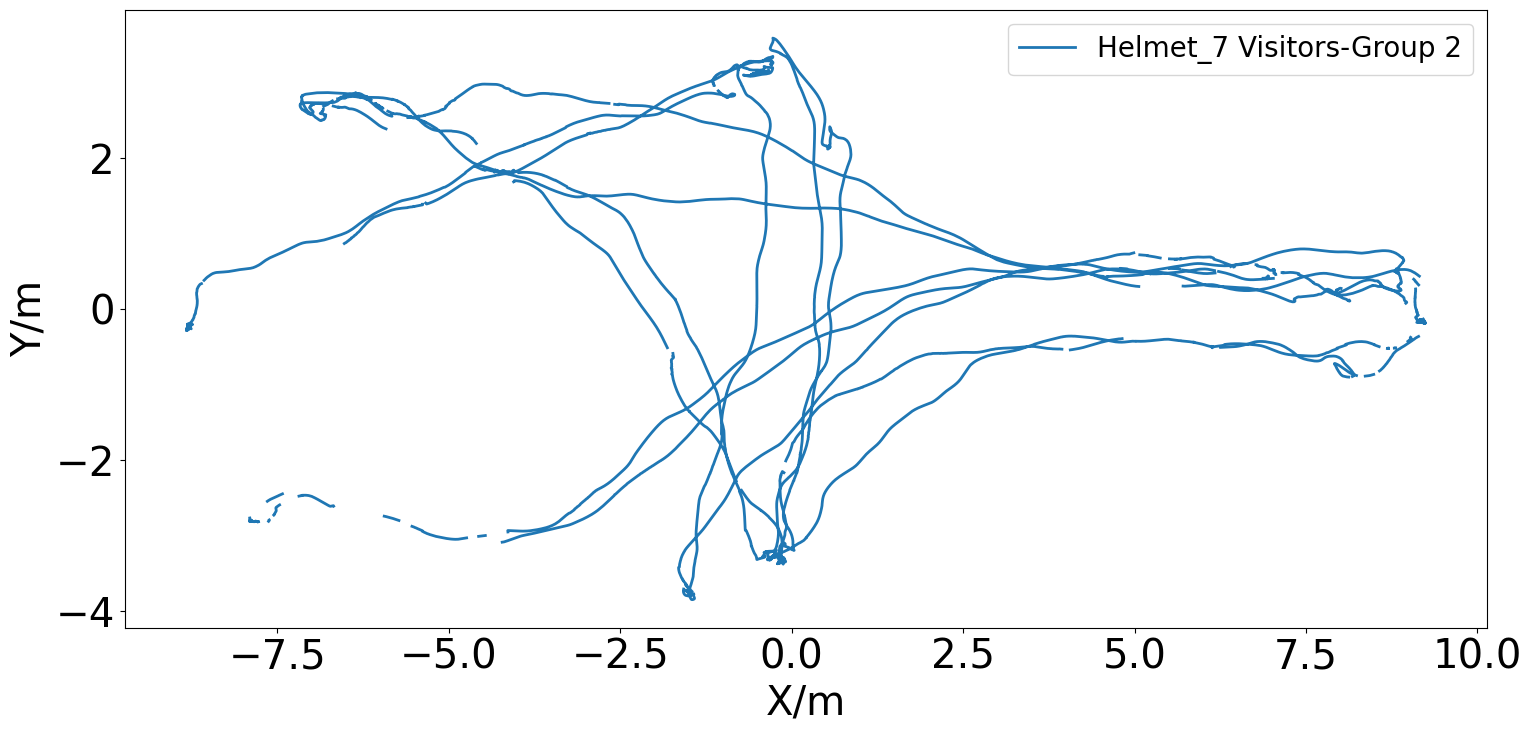

In [160]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylabel("Y/m", fontsize=29)
ax.set_xlabel("X/m", fontsize=29)
traj_data = new_df[new_df["ag_id"] == "Helmet_7"]
ax.plot(
    traj_data["x"]/1000,
    traj_data["y"]/1000,
    label=traj_data["ag_id"].iloc[0] + f" {traj_data['data_label'].iloc[0]}",
    linewidth=2,
)
ax.legend(fontsize="20")
plt.tight_layout()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

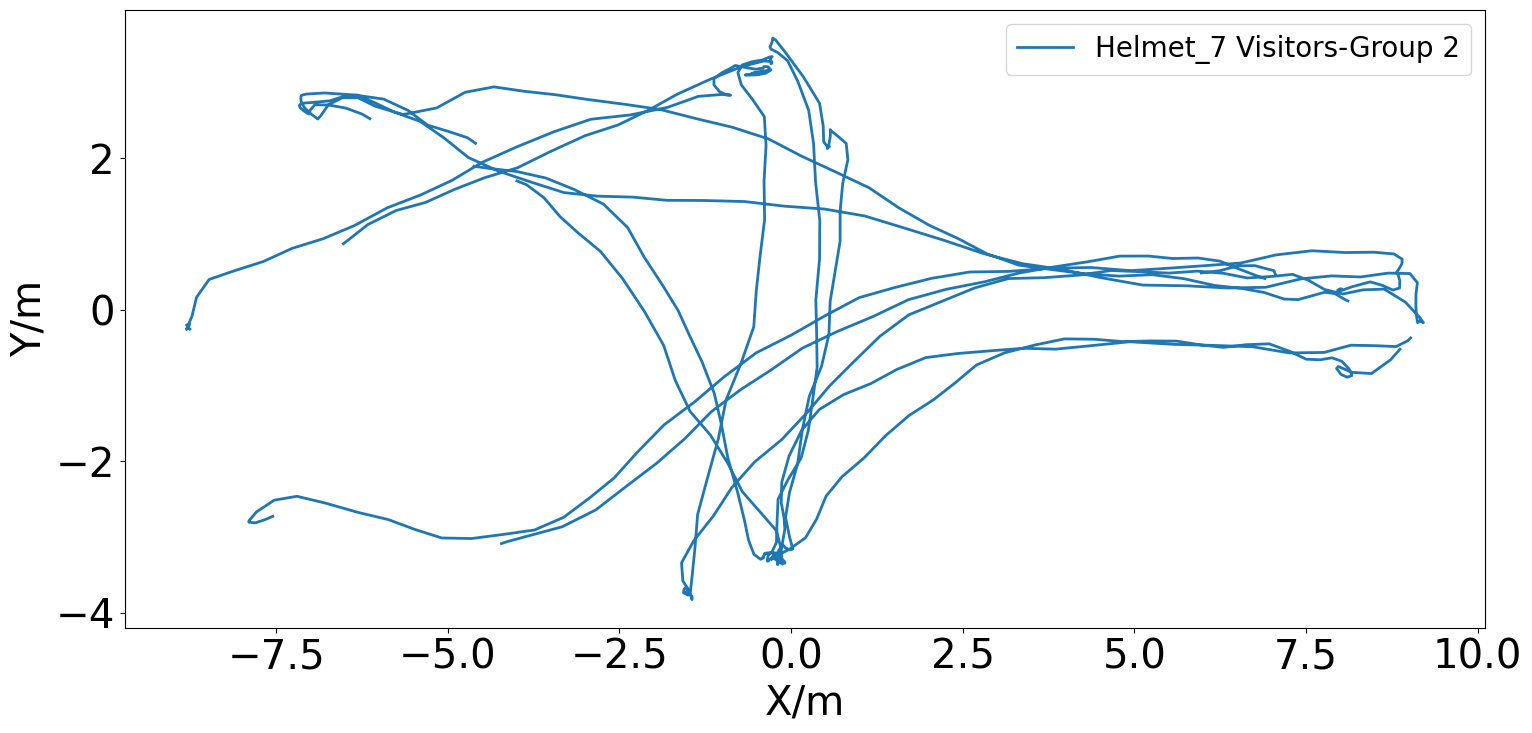

In [161]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylabel("Y/m", fontsize=29)
ax.set_xlabel("X/m", fontsize=29)
traj_data = preprocessed_df[preprocessed_df["ag_id"] == "Helmet_7"]
ax.plot(
    traj_data["x"] / 1000,
    traj_data["y"] /1000,
    label=traj_data["ag_id"].iloc[0]
    + f" {traj_data['data_label'].iloc[0]}",
    linewidth=2,
)
ax.legend(fontsize="20")
plt.tight_layout()
plt.savefig("pp_data.svg")